<a href="https://colab.research.google.com/github/wsamuelw/pycaret-demo/blob/main/Pycaret_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install package
# it is best to install the full version i.e. pycaret[full]
!pip install pycaret


In [1]:
# load package & load data
import numpy as np
from pycaret.datasets import get_data
df = get_data('employee')


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [2]:
# set seed & split data into train and validation
np.random.seed(222)
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
validation = df[~msk]

print(train.shape)
print(validation.shape)

(12045, 10)
(2954, 10)


In [3]:
# import classification module
from pycaret.classification import *

# intialize the setup (the session_id is like the seed for reproducibility)
int_setup = setup(data = train, target = 'left', session_id = 222)

,Description,Value
0,session_id,222
1,Target,left
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(12045, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
# models available
models()


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [5]:
# compare models
# there are more models e.g. xgboost when installing the full version
compare_models = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9856,0.9892,0.9522,0.9865,0.9690,0.9597,0.9600,0.827
lightgbm,Light Gradient Boosting Machine,0.9849,0.9920,0.9532,0.9824,0.9676,0.9578,0.9580,0.201
et,Extra Trees Classifier,0.9790,0.9882,0.9472,0.9634,0.9551,0.9414,0.9416,0.782
gbc,Gradient Boosting Classifier,0.9763,0.9880,0.9281,0.9702,0.9486,0.9332,0.9337,0.704
dt,Decision Tree Classifier,0.9739,0.9675,0.9553,0.9356,0.9453,0.9281,0.9283,0.054
ada,Ada Boost Classifier,0.9600,0.9827,0.9105,0.9195,0.9149,0.8887,0.8888,0.295
knn,K Neighbors Classifier,0.9365,0.9666,0.9020,0.8409,0.8702,0.8283,0.8293,0.166
lr,Logistic Regression,0.9010,0.9405,0.8039,0.7828,0.7929,0.7279,0.7282,1.255
lda,Linear Discriminant Analysis,0.8841,0.9320,0.8240,0.7235,0.7702,0.6932,0.6961,0.073
ridge,Ridge Classifier,0.8819,0.0000,0.7868,0.7326,0.7585,0.6804,0.6814,0.035


In [6]:
# create a random forest model with 10 folds i.e. default setting
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9834,0.9813,0.9347,0.9947,0.9637,0.9530,0.9538
1,0.9870,0.9897,0.9545,0.9895,0.9717,0.9632,0.9635
2,0.9846,0.9882,0.9648,0.9697,0.9673,0.9572,0.9572
3,0.9858,0.9851,0.9497,0.9895,0.9692,0.9600,0.9603
4,0.9881,0.9958,0.9648,0.9846,0.9746,0.9669,0.9670
5,0.9917,0.9959,0.9698,0.9948,0.9822,0.9768,0.9769
6,0.9893,0.9873,0.9548,1.0000,0.9769,0.9699,0.9704
7,0.9834,0.9863,0.9447,0.9843,0.9641,0.9533,0.9536
8,0.9751,0.9887,0.9246,0.9684,0.9460,0.9298,0.9303
9,0.9881,0.9933,0.9598,0.9896,0.9745,0.9668,0.9670


In [7]:
# tune the model with default settings
# looks like the tunned model is not better than the original untuned model
tuned_rf = tune_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9739,0.9774,0.8995,0.9890,0.9421,0.9253,0.9271
1,0.9775,0.9905,0.9242,0.9786,0.9506,0.9361,0.9367
2,0.9870,0.9851,0.9598,0.9845,0.9720,0.9635,0.9636
3,0.9810,0.9866,0.9296,0.9893,0.9585,0.9463,0.9470
4,0.9810,0.9939,0.9296,0.9893,0.9585,0.9463,0.9470
5,0.9846,0.9945,0.9397,0.9947,0.9664,0.9564,0.9571
6,0.9810,0.9894,0.9296,0.9893,0.9585,0.9463,0.9470
7,0.9786,0.9871,0.9196,0.9892,0.9531,0.9393,0.9404
8,0.9703,0.9866,0.9095,0.9628,0.9354,0.9162,0.9168
9,0.9822,0.9955,0.9397,0.9842,0.9614,0.9499,0.9503


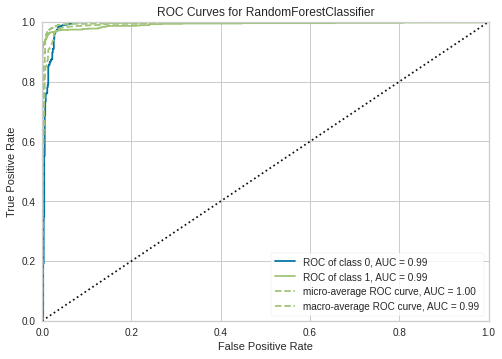

In [8]:
# plot a model
plot_model(tuned_rf)


In [9]:
# evaluate a model
# this function is great but it takes a while to load the plot type when selected
evaluate_model(tuned_rf)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

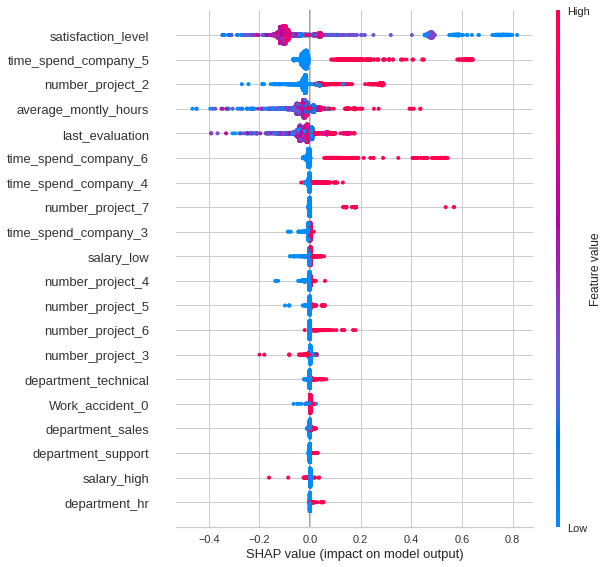

In [10]:
# interpret a model
!pip install shap
interpret_model(tuned_rf)


In [11]:
# generate predictions on hold-out set using trained model
tuned_rf_predictions_holdout = predict_model(tuned_rf)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.979,0.9911,0.9197,0.9939,0.9553,0.9416,0.9428


In [12]:
tuned_rf_predictions_holdout.head()


,satisfaction_level,last_evaluation,average_montly_hours,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_10,time_spend_company_2,time_spend_company_3,time_spend_company_4,time_spend_company_5,time_spend_company_6,time_spend_company_7,time_spend_company_8,Work_accident_0,promotion_last_5years_0,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium,left,Label,Score
0,0.95,0.66,223.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9995
1,0.37,0.57,155.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1.0000
2,0.81,0.78,165.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0.9952
3,0.71,0.36,132.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9870
4,0.68,0.51,176.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9876


In [13]:
print(tuned_rf_predictions_holdout.shape)


(3614, 35)


In [15]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=11, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=-1, oob_score=False, random_state=222, verbose=0,
                       warm_start=False)

In [16]:
# finalize trained model
finalize_model(tuned_rf)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=11, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=-1, oob_score=False, random_state=222, verbose=0,
                       warm_start=False)